# Finance Data Project 

In this data project will focus on exploratory data analysis of stock prices.This project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [2]:
!pip install pandas-datareader
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas-datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------------------------------------- 109.5/109.5 kB 3.1 MB/s eta 0:00:00


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

The stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks.
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [12]:
bank_stocks = pd.read_pickle(r'C:\Users\HP\all_banks')

Bank Ticker    BAC                                     C                        
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9  \
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC          
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98  \
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

Creating a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [26]:
ticker = ['BAC','C', 'GS','JPM','MS','WFC']

In [ ]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1)

In [21]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

Checking the head of the bank_stocks dataframe.

In [22]:
bank_stocks.head()

Bank Ticker    BAC                                     C                        
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9  \
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC          
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98  \
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing.

What is the max Close price for each bank's stock throughout the time period?

In [27]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [24]:
returns = pd.DataFrame()

Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [29]:
for i in ticker:
    returns[i+'Return'] = bank_stocks[i]['Close'].pct_change()

In [30]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


Creating a pairplot using seaborn of the returns dataframe. What stock stands out to you

In [32]:
import seaborn as sns
sns.set()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


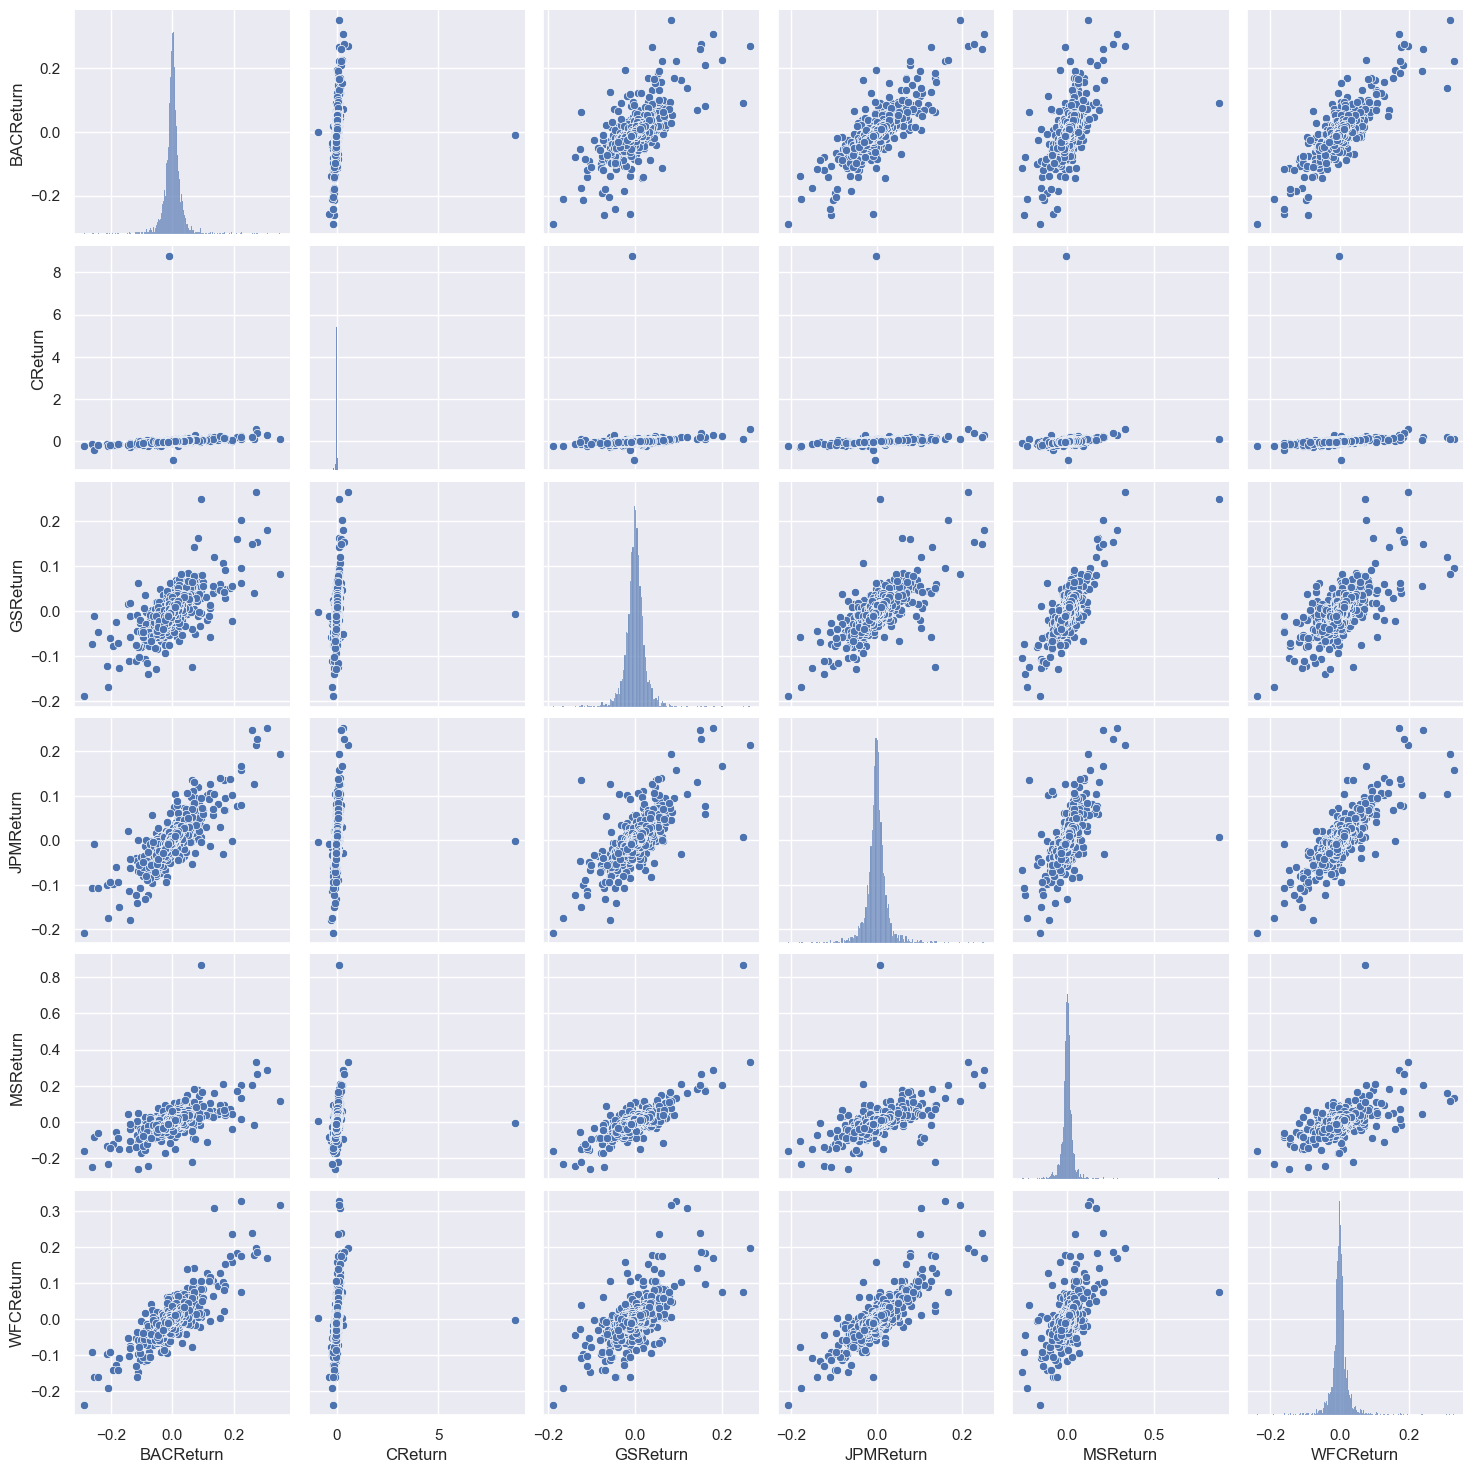

In [33]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

what dates each bank stock had the best and worst single day returns.

In [34]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

Noticed that Citigroup's largest drop and biggest gain were very close to one another.

In [35]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

A look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period, Which would classify as the riskiest for the year 2015

In [36]:
returns.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

In [40]:
returns.loc['2015-1-1':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

Creating a distplot using seaborn of the 2015 returns for Morgan Stanley

<Axes: xlabel='MSReturn', ylabel='Count'>

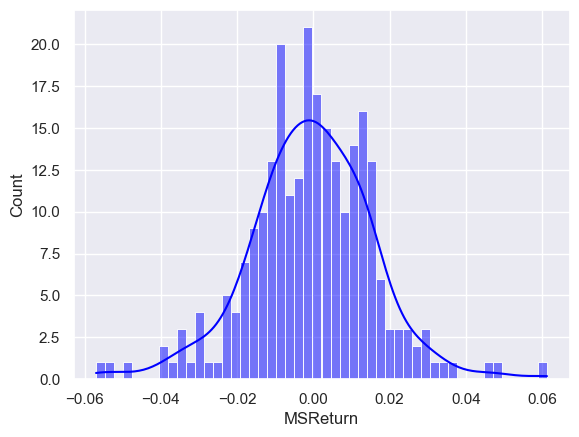

In [46]:
sns.histplot(returns.loc['2015-1-1':'2015-12-31']['MSReturn'], color='blue', bins=50, kde=True)

Creating a distplot using seaborn of the 2008 returns for CitiGroup

<Axes: xlabel='CReturn', ylabel='Count'>

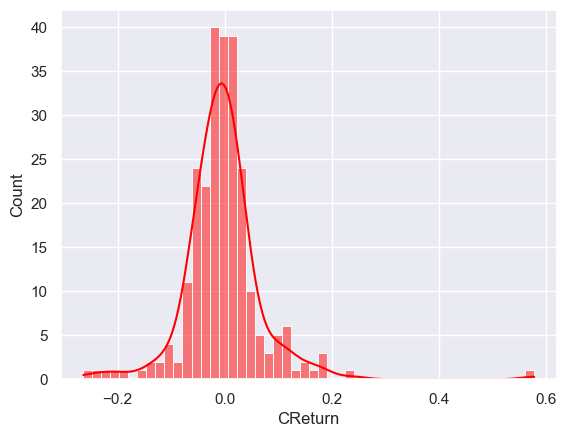

In [49]:
sns.histplot(returns.loc['2008-1-1':'2008-12-31']['CReturn'], color='red', bins=50, kde=True)

____
# More Visualization


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Creating a line plot showing Close price for each bank for the entire index of time.

[]

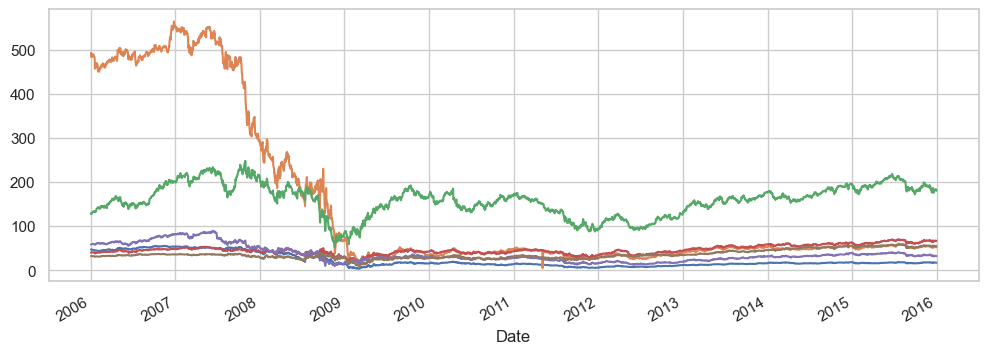

In [54]:
for i in ticker:
    bank_stocks[i]['Close'].plot(label=i, figsize=(12,4))
plt.plot()

[]

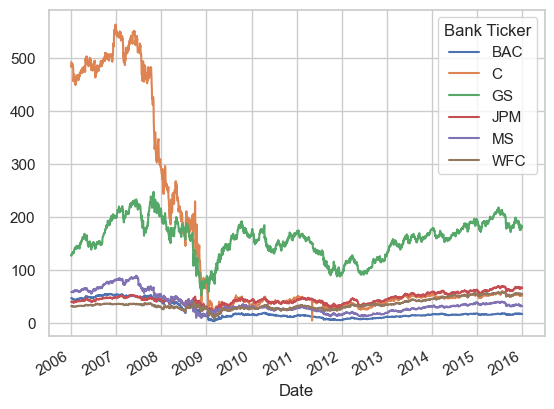

In [57]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()
plt.plot()

In [58]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Ploting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

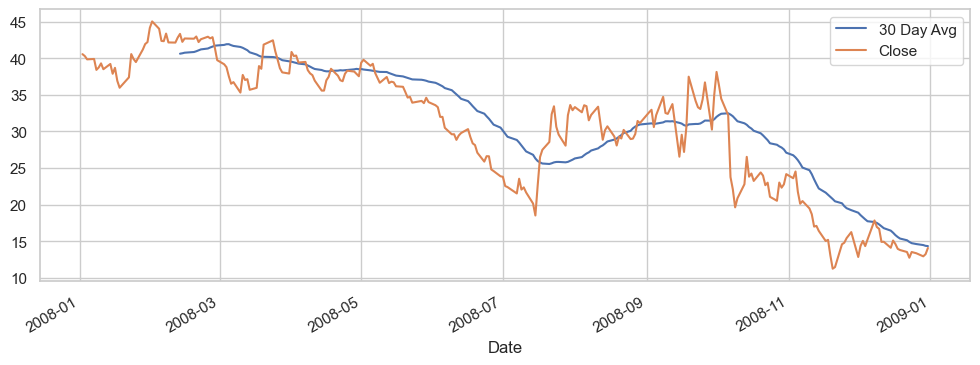

In [62]:
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close'].loc['2008-1-1':'2009-1-1'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['BAC']['Close'].loc['2008-1-1':'2009-1-1'].plot()
plt.legend()


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

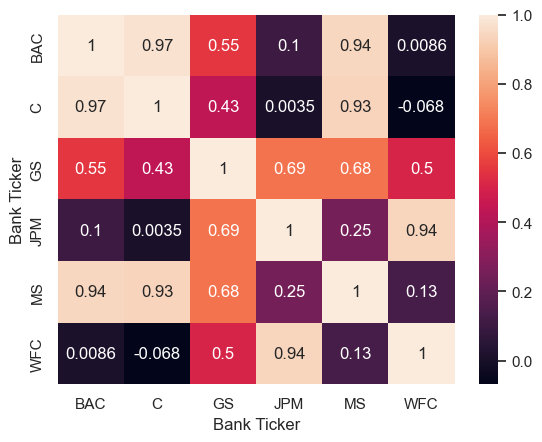

In [66]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)


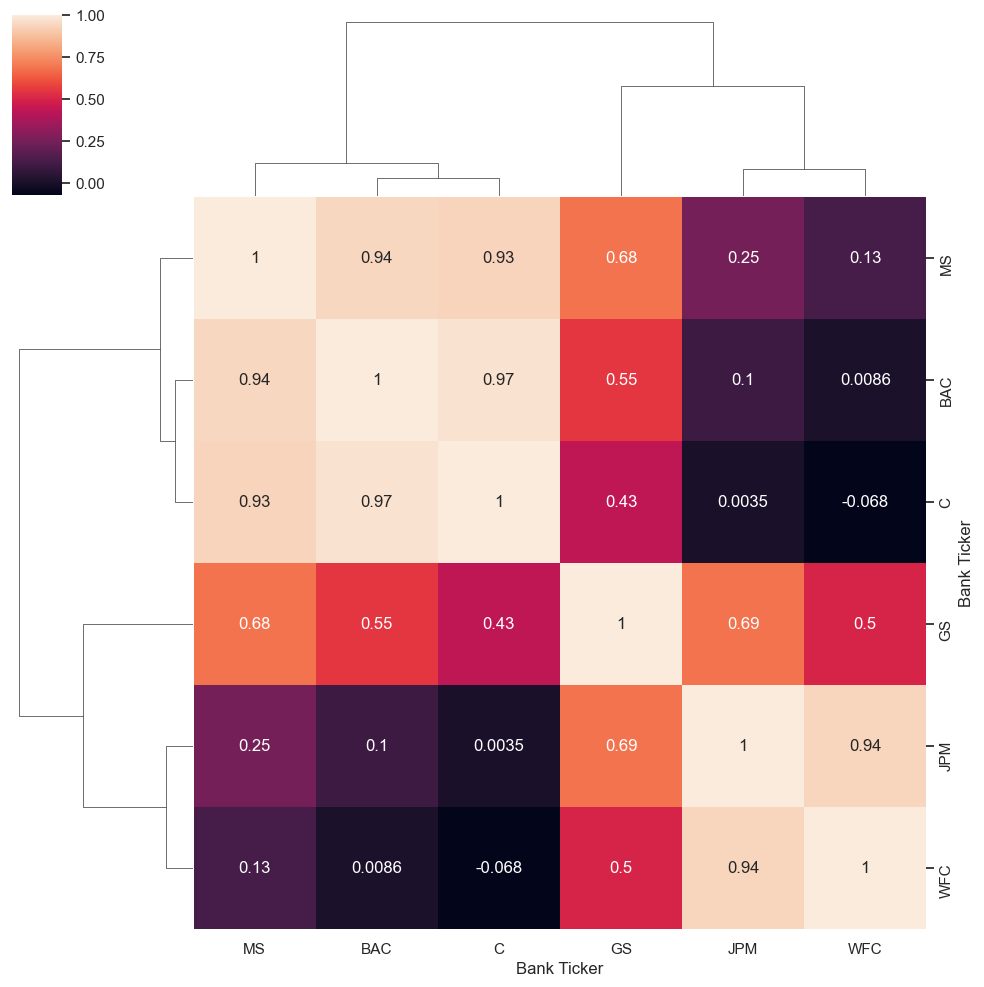

In [67]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)


Creating a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [69]:
bank_stocks['BAC']

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000
...,...,...,...,...,...
2015-12-24,17.32,17.38,17.22,17.27,29373415
2015-12-28,17.22,17.23,16.98,17.13,41777497
2015-12-29,17.25,17.35,17.16,17.28,45670376


In [72]:
bac1 = bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-1-1':'2016-1-1']
bac1.iplot(kind='candle')

A Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [75]:
bank_stocks['MS'][['Open','High','Low','Close']].loc['2015-1-1':'2016-1-1'].ta_plot(study='sma', periods=[13,21,55])

A Bollinger Band Plot for Bank of America for the year 2015.

In [77]:
bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-1-1':'2015-12-31'].ta_plot(study='boll')